# Exploratory Data Analysis

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv("../data/train.csv")

In [30]:
df.head()

,DHSID_EA,cname,year,lat,lon,n_asset,asset_index,n_water,water_index,cluster_id,adm1dhs,urban,path
0,IA-2015-7-00010004,IA,2015,9.165413,92.742696,22.0,2.650768,22.0,5.000000,10004,1,R,dhs_train/IA-2015-7-00010004.npz
1,IA-2015-7-00010005,IA,2015,8.307356,93.093792,22.0,2.157784,22.0,5.000000,10005,1,R,dhs_train/IA-2015-7-00010005.npz
2,IA-2015-7-00010007,IA,2015,7.016968,93.893226,21.0,1.832751,21.0,4.619048,10007,1,R,dhs_train/IA-2015-7-00010007.npz
3,IA-2015-7-00010016,IA,2015,9.194938,92.800432,22.0,2.746096,22.0,5.000000,10016,1,R,dhs_train/IA-2015-7-00010016.npz
4,IA-2015-7-00010018,IA,2015,8.055606,93.543892,22.0,2.581869,22.0,5.000000,10018,1,R,dhs_train/IA-2015-7-00010018.npz


In [31]:
df.shape

(18722, 13)

In [32]:
df.isnull().sum()

DHSID_EA       0
cname          0
year           0
lat            0
lon            0
n_asset        0
asset_index    0
n_water        0
water_index    0
cluster_id     0
adm1dhs        0
urban          0
path           0
dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18722 entries, 0 to 18721
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DHSID_EA     18722 non-null  object 
 1   cname        18722 non-null  object 
 2   year         18722 non-null  int64  
 3   lat          18722 non-null  float64
 4   lon          18722 non-null  float64
 5   n_asset      18722 non-null  float64
 6   asset_index  18722 non-null  float64
 7   n_water      18722 non-null  float64
 8   water_index  18722 non-null  float64
 9   cluster_id   18722 non-null  int64  
 10  adm1dhs      18722 non-null  int64  
 11  urban        18722 non-null  object 
 12  path         18722 non-null  object 
dtypes: float64(6), int64(3), object(4)
memory usage: 1.9+ MB


In [34]:
df.describe()

,year,lat,lon,n_asset,asset_index,n_water,water_index,cluster_id,adm1dhs
count,18722.0,18722.000000,18722.000000,18722.000000,18722.000000,18722.000000,18722.000000,18722.000000,18722.000000
mean,2015.0,23.500364,81.765215,21.078197,0.452946,21.078197,3.940416,199136.914753,19.817541
std,0.0,5.581015,6.268095,1.340639,1.658156,1.340639,0.848510,103207.427029,10.278928
min,2015.0,6.982919,68.784352,6.000000,-3.694463,6.000000,1.000000,10004.000000,1.000000
25%,2015.0,20.965364,76.982762,21.000000,-1.023950,21.000000,3.177807,120493.250000,12.000000
50%,2015.0,24.508411,79.942245,21.000000,0.583486,21.000000,3.954545,192172.500000,19.000000
75%,2015.0,27.089047,85.809479,22.000000,1.969772,22.000000,4.809524,310179.750000,31.000000
max,2015.0,34.847342,97.050089,28.000000,3.461751,28.000000,5.000000,360482.000000,36.000000


In [35]:
df.corr()

,year,lat,lon,n_asset,asset_index,n_water,water_index,cluster_id,adm1dhs
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lat,NaN,1.000000,0.153961,0.003819,-0.137063,0.003819,-0.234538,-0.002257,-0.004206
lon,NaN,0.153961,1.000000,-0.001532,-0.265972,-0.001532,-0.324953,-0.155466,-0.154863
n_asset,NaN,0.003819,-0.001532,1.000000,-0.181002,1.000000,-0.138688,-0.032996,-0.033262
asset_index,NaN,-0.137063,-0.265972,-0.181002,1.000000,-0.181002,0.723632,0.026653,0.029448
n_water,NaN,0.003819,-0.001532,1.000000,-0.181002,1.000000,-0.138688,-0.032996,-0.033262
water_index,NaN,-0.234538,-0.324953,-0.138688,0.723632,-0.138688,1.000000,-0.013246,-0.010455
cluster_id,NaN,-0.002257,-0.155466,-0.032996,0.026653,-0.032996,-0.013246,1.000000,0.999942
adm1dhs,NaN,-0.004206,-0.154863,-0.033262,0.029448,-0.033262,-0.010455,0.999942,1.000000


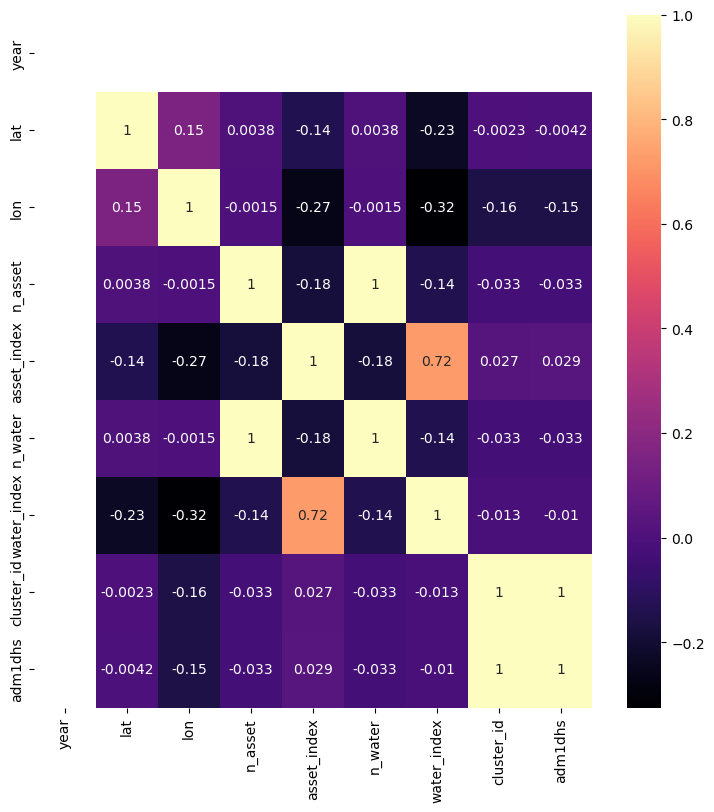

In [55]:
fig = plt.figure(figsize=(9,9))
sns.heatmap(df.corr(), annot=True, cmap="magma")
plt.show()

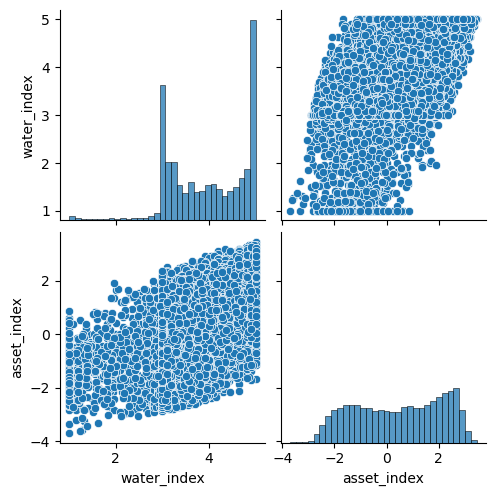

In [54]:
fig = sns.pairplot(df, x_vars=["water_index", "asset_index"], y_vars=["water_index", "asset_index"])
plt.show()

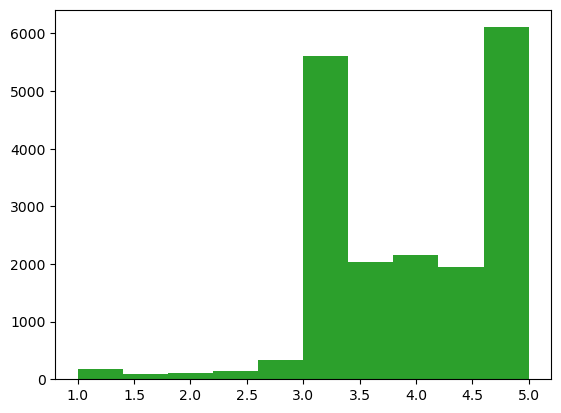

In [58]:
plt.hist(df["water_index"])
plt.show()

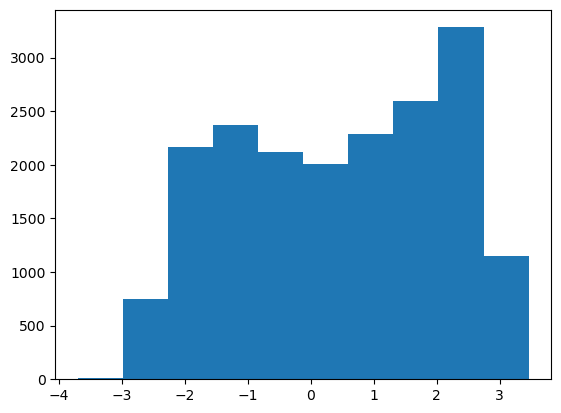

In [59]:
plt.hist(df["asset_index"])
plt.show()